In [1]:
# John Mayer Jr
# Netflix Data Science BootCamp

# Import Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv("../Resources/HREmployeeAttrition.csv")
df.head()


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 35 columns]

In [3]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns = ['Attrition'])
y = df['Attrition']


In [4]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))


Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


### Imbalanced

In [5]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [6]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))


Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [7]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')


In [8]:
# Train the model using the training datasets
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [10]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

print(f'Accuracy: {model.score(X_test, y_test)}')


Accuracy: 0.8197278911564626


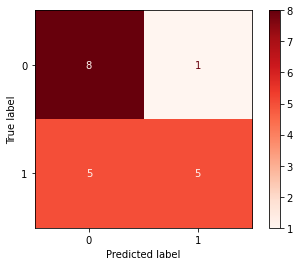

In [26]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)


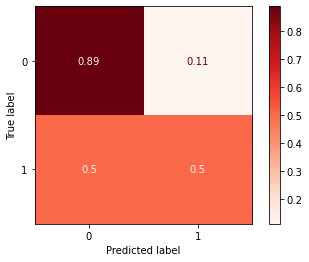

In [27]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')


In [13]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))


              precision    recall  f1-score   support

   Attrition       0.83      0.97      0.90       236
No Attrition       0.65      0.19      0.29        58

    accuracy                           0.82       294
   macro avg       0.74      0.58      0.60       294
weighted avg       0.79      0.82      0.78       294



### Balanced

In [14]:
# Create our Validation training and testing datasets with balancing.
B = df[df['Attrition'] == 0].iloc[:47]
A = df[df['Attrition'] == 1].iloc[:47]
x = pd.concat([A, B], ignore_index=True)
X = x.drop(columns = ['Attrition'])
y = x['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)


In [15]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y_test.value_counts())
print("")
print("Percentage:")
print(y_test.value_counts(normalize=True))


Total Counts:
1    10
0     9
Name: Attrition, dtype: int64

Percentage:
1    0.526316
0    0.473684
Name: Attrition, dtype: float64


In [16]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')


In [17]:
# Train the model using the training sets
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [18]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)


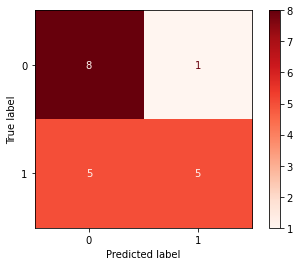

In [28]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)


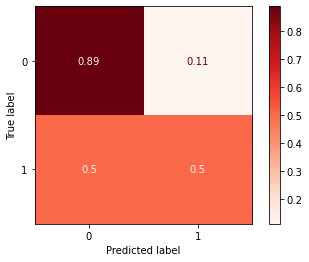

In [29]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')


In [23]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))


              precision    recall  f1-score   support

   Attrition       0.62      0.89      0.73         9
No Attrition       0.83      0.50      0.62        10

    accuracy                           0.68        19
   macro avg       0.72      0.69      0.68        19
weighted avg       0.73      0.68      0.67        19

